## URL Evaluation Model using Decision Tree

<h3 style="color:green">Logistic Regression Model with Weights and Biases<h3>
In this notebook, we will train a model to evaluate URLs and predict whether they are good or potentially malicious. We will use a Decision Tree classifier and Logistic Regression for this task. 

<h1 style="background-color:green; color:white; padding:5px 100px">WEIGHT and BIAS</h1>

<i style="font-weight:bold">Weights and Biases are parameters used by algorithms to make predictions. Their role is crucial in determining the output of the model and understanding how it arrives at its predictions.</i>


<p style="padding:10px 10px; background-color:#ff6620; color:black; font-weight:bold; font-size:25px">Weights</p>


Weights are coefficients that multiply the input features in a model. They are the parameters learned from the data during training. In the context of a logistic regression model or a neural network:

1. Logistic Regression: Weights determine the importance of each feature. For example, if a feature has a high positive weight, it significantly contributes to predicting a positive class.

2. Neural Networks: Weights in neural networks control the signal transmitted between neurons. They determine how much influence one neuron has on another.

Influence of Weights:

- Feature Importance: Higher absolute values of weights indicate that the feature is more important for the prediction.

- Model Interpretation: By examining weights, especially in simpler models like linear regression or logistic regression, we can interpret how each feature affects the output.

<p style="padding:10px 10px; background-color:#ff6620; color:black; font-weight:bold; font-size:25px">Bias</p>

Bias is an additional parameter added to the weighted sum of inputs before passing it through the activation function. It allows the model to fit the data better by providing an additional degree of freedom.

Influence of Bias:

- Adjustment: Bias helps adjust the output along with the weighted sum. It allows the model to output non-zero predictions even when all input features are zero.

- Shifting: Bias shifts the activation function to the left or right, helping the model to fit the training data better.

Necessity:

Flexibility: Weights and biases provide the necessary flexibility for models to learn complex patterns.
Accuracy: Proper tuning of weights and biases is essential for the accuracy of the model.

<p style="color:green">In logistic regression, weights are the coefficients learned from the data, and the bias (intercept) is an additional parameter added to the weighted sum.</p>

The steps involved include data exploration, preprocessing, model training, evaluation, and visualization.

### Steps:
1. **Data Exploration**: Understand the dataset through visualizations and statistics.
2. **Data Preprocessing**: Prepare the data for modeling by handling missing values, encoding categorical features, and scaling.
3. **Model Training**: Train a Decision Tree classifier on the preprocessed data.
4. **Model Evaluation**: Evaluate the model using various metrics and visualize the results.
5. **Visualization**: Visualize the Decision Tree and feature importances.

### 1. Data Exploration

We will start by loading the dataset and exploring it to understand its structure and contents. This involves checking for missing values, displaying basic statistics, and visualizing distributions and correlations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
# Load the data
df = pd.read_csv('../dataset/urlset.csv', encoding= 'latin-1')

# Display the first few rows of the dataframe
df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_18028\3431969104.py:2: DtypeWarning: Columns (1,2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/urlset.csv', encoding= 'latin-1')


,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1,NaN
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1,NaN
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1,NaN
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1,NaN
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1,NaN


#### Show sample data

In [3]:
df.sample(15)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
41791,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,4570,1,1,13.0,115.230769,112.923077,0.004651,0.004065,0.002663,0.002037,0.571429,0.818516,1,NaN
78181,www.radsoftware.com.au/regexdesigner/,10000000,0,0,2.0,38.500000,37.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.755814,0,NaN
24827,www.bushlandflora.com.au/includes/rollBack/.re...,10000000,0,0,7.0,56.857143,49.857143,0.000000,0.000000,0.000000,0.000000,0,0.652655,1,NaN
41071,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,4570,1,1,25.0,59.920000,58.720000,0.004651,0.004065,0.002663,0.002037,0.571429,0.818516,1,NaN
89959,www.doggysoft.co.uk/qtmplay/,10000000,0,0,2.0,75.000000,75.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.72,0,NaN
6621,chatsrv924cgi.goodluckwith.us/eBay_Buyer_Prote...,10000000,0,0,10.0,71.000000,71.200000,0.000000,0.000000,0.000000,0.000000,0,0.773067,1,NaN
43560,wysin.net/zaz/log/secure-code0/security/login.php,10000000,1,0,7.0,279.000000,294.571429,0.000000,0.000000,0.000000,0.000000,0.5,0.827492,1,NaN
57623,hawaii.gov/ogg,32673,1,1,1.0,24.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.712121,0.555556,0,NaN
15501,equityfunding.net/equity/funding.htm,10000000,0,0,3.0,29.666667,24.333333,0.000000,0.000000,0.000000,0.000000,0,0.741935,1,NaN
42885,beingsalmankhan.net/wp-content/themes/twentyte...,10000000,1,0,6.0,35.000000,30.333333,0.000000,0.000000,0.000000,0.000000,0.25,0.69697,1,NaN


#### Check for missing values

In [4]:
# Check for missing values
df.isnull().sum()

domain               4
ranking             56
mld_res             74
mld.ps_res          85
card_rem            86
ratio_Rrem          86
ratio_Arem          86
jaccard_RR          87
jaccard_RA          88
jaccard_AR          89
jaccard_AA          90
jaccard_ARrd        90
jaccard_ARrem       92
label               96
Unnamed: 14      96008
dtype: int64

In [5]:
# Basic statistics of the dataset
df.describe()

,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,Unnamed: 14
count,95924.000000,95924.000000,95924.000000,95923.000000,95922.000000,95921.000000,95920.000000,2.0
mean,4.580408,135.252553,138.544956,0.008613,0.003808,0.003378,0.003661,1.0
std,4.466098,160.989105,175.479635,0.846015,0.025638,0.024010,0.028492,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.000000,43.000000,39.666667,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.000000,104.000000,103.333333,0.000000,0.000000,0.000000,0.000000,1.0
75%,6.000000,174.142857,178.308333,0.000000,0.000000,0.000000,0.000000,1.0
max,187.333333,5507.000000,6097.000000,183.750000,2.000000,1.000000,1.000000,1.0


In [6]:
df.shape

(96010, 15)

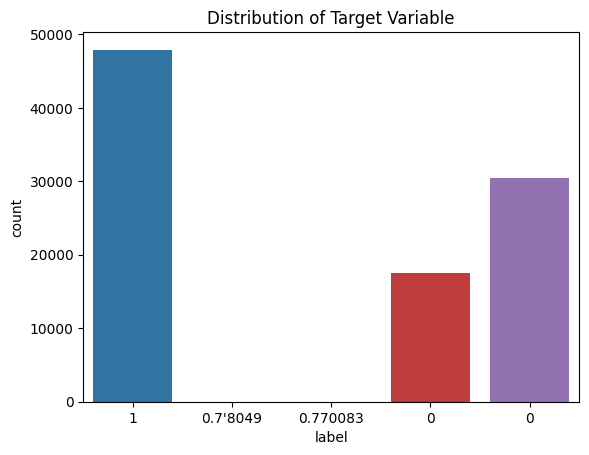

In [7]:
# Plot the distribution of the target variable
sns.countplot(x='label', data=df)
plt.title('Distribution of Target Variable')
plt.show()

It looks like the label column contains a mix of numerical values and strings, and also includes NaN values. We need to clean and standardize this column before we can use it for modeling.

### 2. Data Preprocessing

##### Cleaning the Label Column

We will clean the `label` column by:
1. Handling NaN values.
2. Converting string representations of numbers to actual numbers.
3. Standardizing to binary classification (0 or 1).


In [8]:
df['label'] = pd.to_numeric(df['label'], errors='coerce').fillna(0) # filling them with 0
df['label'] = (df['label'] >= 0.5).astype(int)


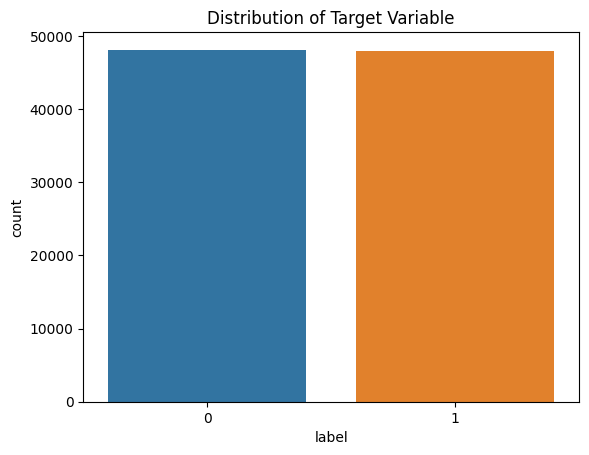

In [9]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Now the label column is very well distributed

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96010 entries, 0 to 96009
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96006 non-null  object 
 1   ranking        95954 non-null  object 
 2   mld_res        95936 non-null  object 
 3   mld.ps_res     95925 non-null  object 
 4   card_rem       95924 non-null  float64
 5   ratio_Rrem     95924 non-null  float64
 6   ratio_Arem     95924 non-null  float64
 7   jaccard_RR     95923 non-null  float64
 8   jaccard_RA     95922 non-null  float64
 9   jaccard_AR     95921 non-null  float64
 10  jaccard_AA     95920 non-null  float64
 11  jaccard_ARrd   95920 non-null  object 
 12  jaccard_ARrem  95918 non-null  object 
 13  label          96010 non-null  int32  
 14  Unnamed: 14    2 non-null      float64
dtypes: float64(8), int32(1), object(6)
memory usage: 10.6+ MB


In [11]:
df['mld_res'].unique()

array(['1', '0', nan,
       'ë\x87\x05vbþÍÈ\x18wÉ;é]bu\x8avfnfsi¤\x17iOÕFÔºc\x89', '178',
       '10000000', '9', 'Tø\x84¬\t\\ÌªY\x1dD:"',
       "'Þ@\x85Þ\x17òÙl\x14dðR\x1e<jyG\x80`$ØÃhé\x0e-3\x93MÁ\x90\x9f³9\x8c?t?\x0f\x18ñX\x9aõ\x08scJúB\\\x0foÚÆ\x81VDñÔÑ§¿ÑÕ",
       "MJ¾#\x1b<M\x86·æèÈ§»¢º\x8dem\x03áï\x9e·Låï\xadµ=\x99\x12\x97:xÎ\x0büHÖÞÞ¸¼^§](6¼\x12 ö\x13OnÄM¤´G@at±Û \x9c×1È\x01v\x19ï¼´íMF~¿D\x03\x03%f³.\x92{\x10&\x8fÜXO\x1d\x81\x0b¼\x0fáº\x98$Éâ\xa0<zÄ²¯ÈI±ÆáÐ\\Zo'\x9b\x81!?F#9?ì.\x1e5â±=ª\x10æF\x85ô\x84¹\x1fÏµ¬\x16¬\x8bã©\xa0O?\x82ª\x14¦2°á¾ØPü÷\x9a]5÷ð\x99KQ5¢ö",
       '\x94\x02ß1®\x05\x94à\x15Éªgãt¨Z\x18"©¬\x8f£Ý\x95Z\x05ãå\'ä\x04ûxÂË`\x17é\x90}ié\x98ý\x81\x83²\x89C\x1dÔ',
       '#Î´°Ë=\x91\x92\x7fPRºÉb.R²I\x8aDxÆ\x8b\x14"üª\x1c&ÚÚËÊ\x1aÎ\x9asöÊ\x07\x0fÖø\x9dm!âN6\x1e\x9fï\x967¤\x8fÅÙw£ÿ\x96û\xadJ6-\x9d\x9eêÊ\x9e\x80\x8enÈ\x8d8ëx\x0eÂ¥ä\x1dz@|µýPK;ñÜPÏõë!ÈÍ\x7fÜ\x1cH^ÐX\x1a\x1b\x12\x8e»@pua\x0ftuR',
       'ºÁâÆ8\x98=HÚ\x1eBç\x83\x10\x04\x8c}ðæÎ\x8br&\x1eSæSÄPeøÌ+ÆR\\Cî\x1

In [12]:
df['mld.ps_res'].unique()

array(['0', '1', '11', nan, '189', '7',
       '¾\x81\x96ó-¢\\\x07é\\t¬\x1al\x17¼\x96îìî×lNz\x994Ôïårâ\x97~\x7f\x8dZ¯îÂ-ê\x9bØç0\x9c\x1b8',
       '148.818182', 0, 1], dtype=object)

The column `mld_res` and `mld.ps_res` contain a mixture of numeric values, strings, and some corrupted or non-standard text. These columns need to be cleaned and standardized to numerical values before further analysis can be performed.

In order to achieve this, we need to:

1. Identify and convert valid numeric values.
2. Handle corrupted or non-standard text (e.g., by replacing with NaN).
3. Decide on a strategy for NaN values (e.g., imputation or removal).

In [13]:
df['mld_res'] = pd.to_numeric(df['mld_res'], errors='coerce')
df['mld.ps_res'] = pd.to_numeric(df['mld.ps_res'], errors= 'coerce')
df['ranking'] = pd.to_numeric(df['ranking'], errors = 'coerce')
df['jaccard_ARrem'] = pd.to_numeric(df['jaccard_ARrem'], errors= 'coerce')
df['jaccard_ARrd'] = pd.to_numeric(df['jaccard_ARrd'], errors = 'coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96010 entries, 0 to 96009
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96006 non-null  object 
 1   ranking        95920 non-null  float64
 2   mld_res        95924 non-null  float64
 3   mld.ps_res     95924 non-null  float64
 4   card_rem       95924 non-null  float64
 5   ratio_Rrem     95924 non-null  float64
 6   ratio_Arem     95924 non-null  float64
 7   jaccard_RR     95923 non-null  float64
 8   jaccard_RA     95922 non-null  float64
 9   jaccard_AR     95921 non-null  float64
 10  jaccard_AA     95920 non-null  float64
 11  jaccard_ARrd   95919 non-null  float64
 12  jaccard_ARrem  95916 non-null  float64
 13  label          96010 non-null  int32  
 14  Unnamed: 14    2 non-null      float64
dtypes: float64(13), int32(1), object(1)
memory usage: 10.6+ MB


### domain is not numerical and we can not do much about it
### also the unnamed column should be dropped because it has only 2 values

### Correlation with the label column

In [15]:
df.drop(columns= ['domain', 'Unnamed: 14'], inplace=True)

In [16]:
df.head()

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,10000000.0,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1
1,10000000.0,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0.0,0.768577,1
2,10000000.0,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0.0,0.726582,1
3,10000000.0,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0.0,0.859640,1
4,10000000.0,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0.0,0.748971,1


### Replace all missing values with the mean

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96010 entries, 0 to 96009
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ranking        95920 non-null  float64
 1   mld_res        95924 non-null  float64
 2   mld.ps_res     95924 non-null  float64
 3   card_rem       95924 non-null  float64
 4   ratio_Rrem     95924 non-null  float64
 5   ratio_Arem     95924 non-null  float64
 6   jaccard_RR     95923 non-null  float64
 7   jaccard_RA     95922 non-null  float64
 8   jaccard_AR     95921 non-null  float64
 9   jaccard_AA     95920 non-null  float64
 10  jaccard_ARrd   95919 non-null  float64
 11  jaccard_ARrem  95916 non-null  float64
 12  label          96010 non-null  int32  
dtypes: float64(12), int32(1)
memory usage: 9.2 MB


In [18]:
# Replace all missing values with the mean of their respective columns
df.fillna(df.mean(), inplace=True)

# Check if there are any remaining missing values
df.isnull().sum()

ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
label            0
dtype: int64

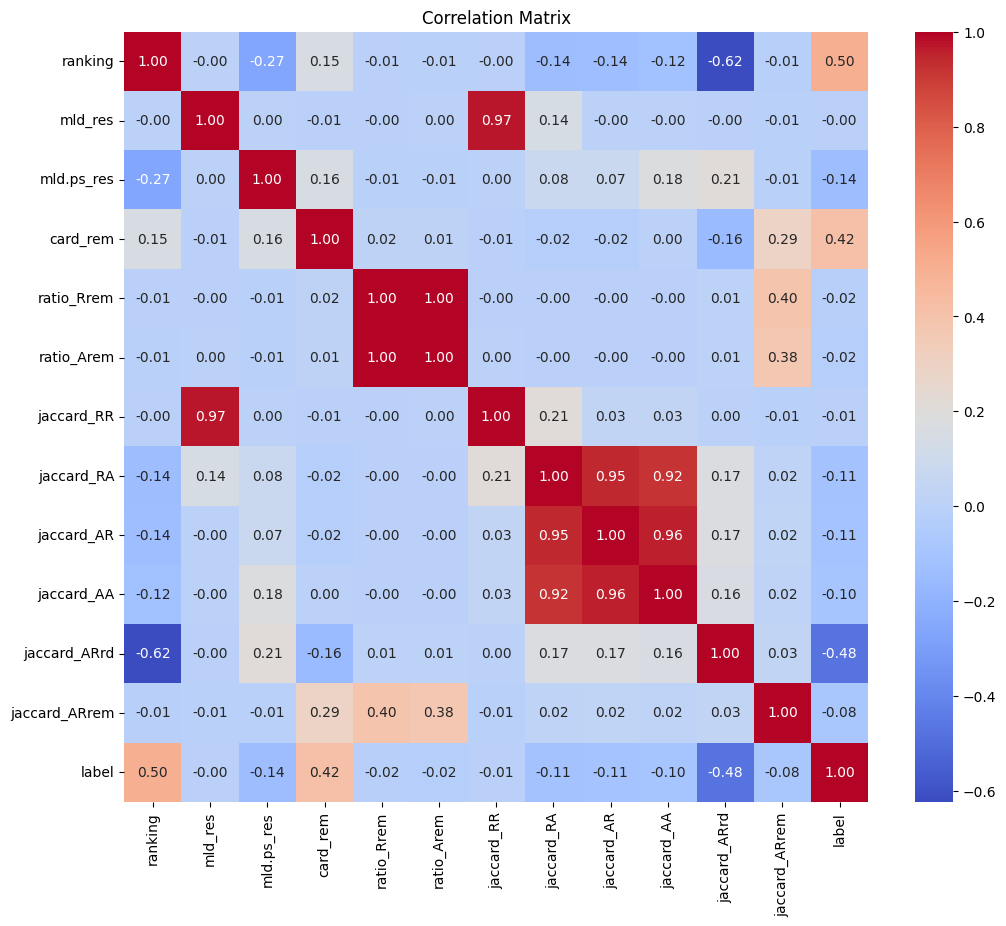

In [19]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Split the data into features and target

In [20]:
X = df.drop(columns=['label'])
y = df['label']

#### Split the data into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(76808, 12)

In [23]:
y_train.shape

(76808,)

### 3. Model Training

<h2 style="color:green; border:1px solid #ff0000; width:fit-content; padding:10px 40px">I. Decision Tree</h2>

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4. Model evaluation

In [26]:
# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9417768982397667
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9581
           1       0.94      0.95      0.94      9621

    accuracy                           0.94     19202
   macro avg       0.94      0.94      0.94     19202
weighted avg       0.94      0.94      0.94     19202



#### Confusion Matrix

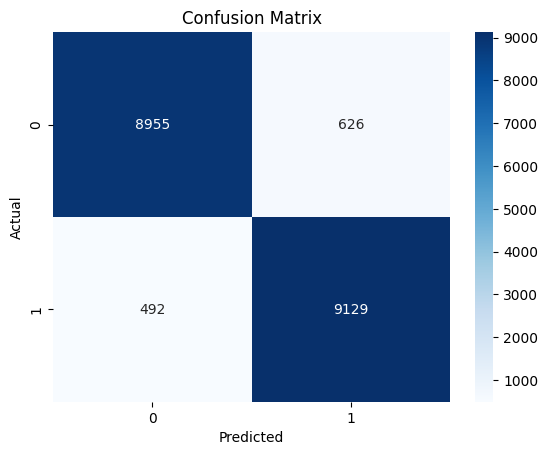

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
accuracy_dt = accuracy_score(y_test, y_pred)

### 5. Plot feature importances

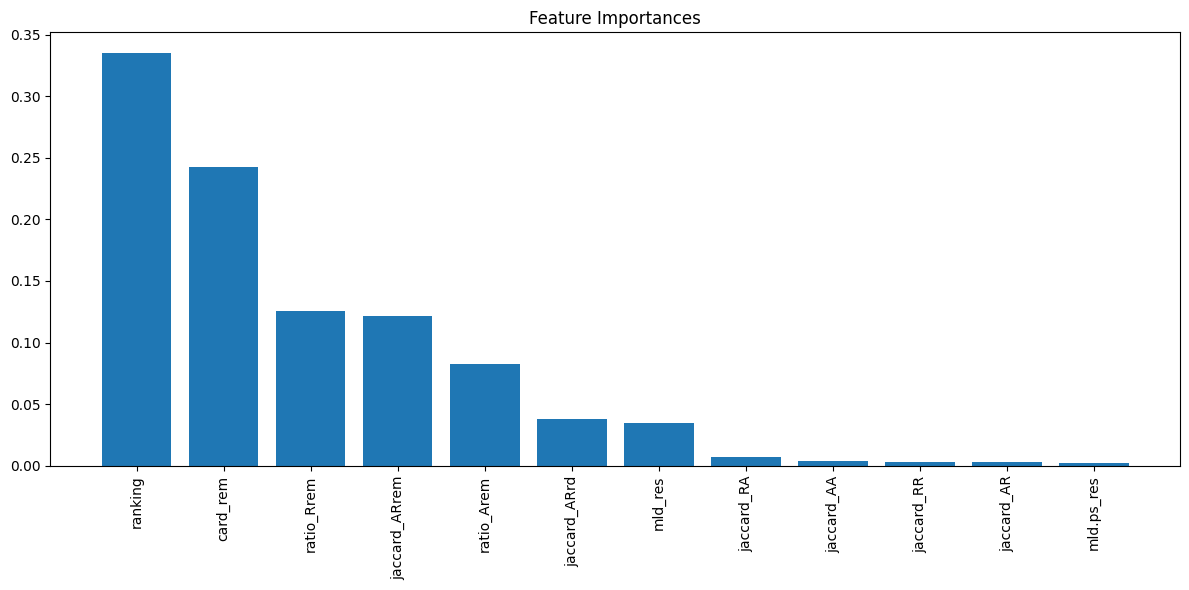

In [29]:
# Plot feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


<h2 style="color:green; border:1px solid #ff0000; width:fit-content; padding:10px 40px">II. Logistic Regression</h2>

In [30]:
from sklearn.linear_model import LogisticRegression

###  Train the Logistic Regression model 

In [31]:
# Train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)


### Evaluate the model

In [32]:
# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      9581
           1       0.70      0.83      0.76      9621

    accuracy                           0.74     19202
   macro avg       0.75      0.74      0.74     19202
weighted avg       0.75      0.74      0.74     19202

[[6180 3401]
 [1616 8005]]


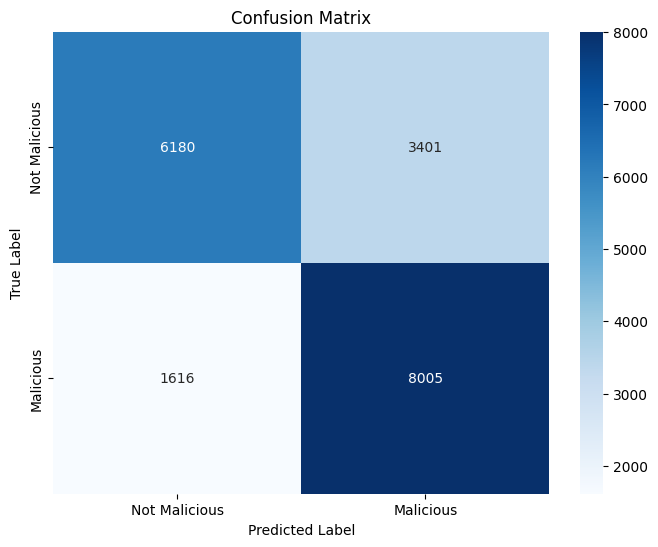

Accuracy: 0.74


In [33]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Malicious', 'Malicious'], yticklabels=['Not Malicious', 'Malicious'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [34]:
accuracy_lr = accuracy_score(y_test, y_pred)
# Compare accuracies
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

Decision Tree Accuracy: 0.94
Logistic Regression Accuracy: 0.74


<h3 style="background-color:blue; color:white; padding: 20px 40px">Weight and Bias</h3>

In [35]:
# Extract the weights (coefficients) and bias (intercept)
weights = logistic_regression_model.coef_[0]
bias = logistic_regression_model.intercept_[0]

# Create a DataFrame to display the weights and their corresponding feature names
feature_names = X.columns
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': weights})
weights_df = weights_df.sort_values(by='Weight', ascending=False)

# Display the weights
print(weights_df)

# Print the bias
print(f'Bias (Intercept): {bias:.2f}')


          Feature        Weight
3        card_rem  2.332566e-05
0         ranking  1.294649e-07
8      jaccard_AR -1.097643e-07
6      jaccard_RR -1.187511e-07
9      jaccard_AA -1.225635e-07
1         mld_res -1.229860e-07
7      jaccard_RA -1.249250e-07
2      mld.ps_res -5.093841e-06
11  jaccard_ARrem -7.558555e-06
10   jaccard_ARrd -8.071697e-06
4      ratio_Rrem -1.438439e-03
5      ratio_Arem -1.507216e-03
Bias (Intercept): -0.00


### OBSERVATION

It looks like the model trained using decision performs better than Logistic Regression